In [2]:
from konlpy.tag import Kkma

kkma = Kkma()

In [5]:
kkma.sentences('한국어 분석을 시작합니다 재미있어요~~')

['한국어 분석을 시작합니다', '재미있어요~~']

In [6]:
kkma.nouns('한국어 분석을 시작합니다 재미있어요~~')

['한국어', '분석']

In [7]:
kkma.pos('한국어 분석을 시작합니다 재미있어요~~')

[('한국어', 'NNG'),
 ('분석', 'NNG'),
 ('을', 'JKO'),
 ('시작하', 'VV'),
 ('ㅂ니다', 'EFN'),
 ('재미있', 'VA'),
 ('어요', 'EFN'),
 ('~~', 'SW')]

In [8]:
from konlpy.tag import Hannanum

hannaum = Hannanum()

In [9]:
hannaum.nouns('한국어 분석을 시작합니다 재미있어요~~')

['한국어', '분석', '시작']

In [10]:
hannaum.morphs('한국어 분석을 시작합니다 재미있어요~~')

['한국어', '분석', '을', '시작', '하', 'ㅂ니다', '재미있', '어요', '~~']

In [11]:
hannaum.pos('한국어 분석을 시작합니다 재미있어요~~')

[('한국어', 'N'),
 ('분석', 'N'),
 ('을', 'J'),
 ('시작', 'N'),
 ('하', 'X'),
 ('ㅂ니다', 'E'),
 ('재미있', 'P'),
 ('어요', 'E'),
 ('~~', 'S')]

In [13]:
from konlpy.tag import Okt

twit = Okt()

In [14]:
twit.nouns('한국어 분석을 시작합니다 재미있어요~~')

['한국어', '분석', '시작']

In [15]:
twit.morphs('한국어 분석을 시작합니다 재미있어요~~')

['한국어', '분석', '을', '시작', '합니다', '재미있어요', '~~']

In [16]:
twit.pos('한국어 분석을 시작합니다 재미있어요~~')

[('한국어', 'Noun'),
 ('분석', 'Noun'),
 ('을', 'Josa'),
 ('시작', 'Noun'),
 ('합니다', 'Verb'),
 ('재미있어요', 'Adjective'),
 ('~~', 'Punctuation')]

In [17]:
from wordcloud import WordCloud, STOPWORDS
import numpy as np
from PIL import Image

In [20]:
import requests
from io import BytesIO

txt_url = 'https://raw.githubusercontent.com/PinkWink/ML_tutorial/master/nltk_dataset/06_alice.txt'
img_url = 'https://github.com/PinkWink/ML_tutorial/blob/master/nltk_dataset/06_alice_mask.png?raw=true'

text = requests.get(txt_url).text

img_res = requests.get(img_url)
alice_mask = np.array(Image.open(BytesIO(img_res.content)))

stopwords = set(STOPWORDS)
stopwords.add('said')

In [23]:
import matplotlib.pyplot as plt
from matplotlib import rc

rc('font', family='Malgun Gothic')

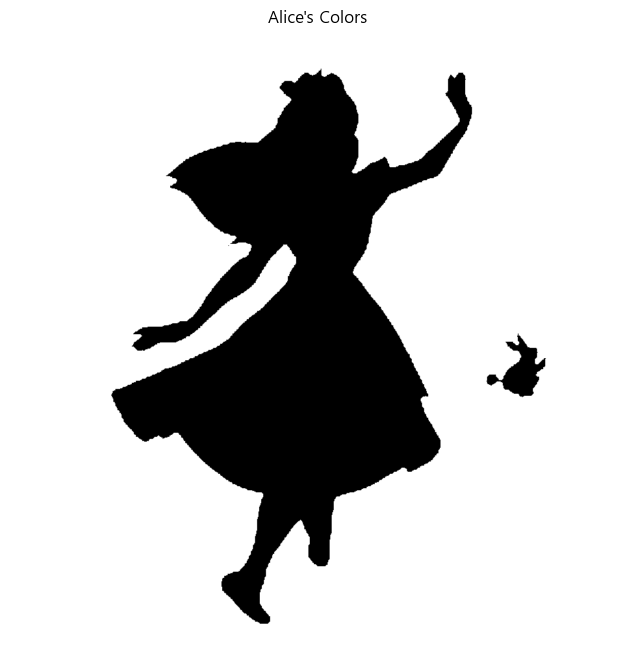

In [24]:
plt.figure(figsize=(8, 8))
plt.imshow(alice_mask, cmap=plt.cm.gray, interpolation='bilinear')
plt.axis('off')
plt.title("Alice's Colors")
plt.show()

In [25]:
wc = WordCloud(background_color='white', max_words=2000, mask=alice_mask, stopwords=stopwords)

wc = wc.generate(text)

In [26]:
wc.words_ # 단어들의 발생빈도

{'Alice': 1.0,
 'little': 0.29508196721311475,
 'one': 0.27595628415300544,
 'know': 0.2459016393442623,
 'went': 0.226775956284153,
 'thing': 0.2185792349726776,
 'time': 0.2103825136612022,
 'Queen': 0.20765027322404372,
 'see': 0.1830601092896175,
 'King': 0.17486338797814208,
 'well': 0.1721311475409836,
 'now': 0.16393442622950818,
 'head': 0.16393442622950818,
 'began': 0.15846994535519127,
 'way': 0.1557377049180328,
 'Hatter': 0.1557377049180328,
 'Mock Turtle': 0.15300546448087432,
 'say': 0.15027322404371585,
 'Gryphon': 0.15027322404371585,
 'think': 0.1448087431693989,
 'quite': 0.14207650273224043,
 'much': 0.13934426229508196,
 'first': 0.13934426229508196,
 'thought': 0.1366120218579235,
 'go': 0.1366120218579235,
 'come': 0.13114754098360656,
 'never': 0.1284153005464481,
 'voice': 0.12568306010928962,
 'looked': 0.12295081967213115,
 'got': 0.12295081967213115,
 'must': 0.12021857923497267,
 'Cat': 0.12021857923497267,
 'Duchess': 0.11475409836065574,
 'Mouse': 0.11202

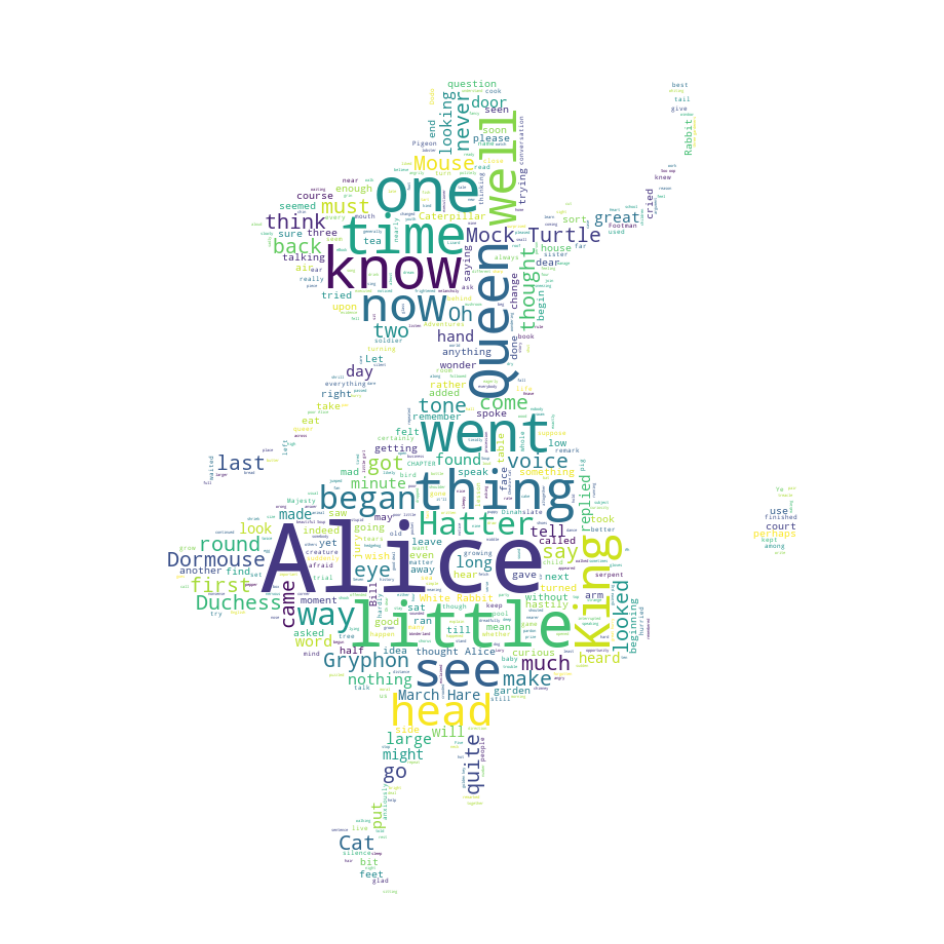

In [27]:
plt.figure(figsize=(12, 12))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show()

In [29]:
star_url = 'https://raw.githubusercontent.com/PinkWink/ML_tutorial/master/nltk_dataset/06_a_new_hope.txt'
star_img_url = 'https://github.com/PinkWink/ML_tutorial/blob/master/nltk_dataset/06_stormtrooper_mask.png?raw=true'

star_text = requests.get(star_url).text
star_text = star_text.replace('HAN', 'Han')
star_text = star_text.replace("LUKE's", 'Luke')


star_img_res = requests.get(star_img_url)
star_mask = np.array(Image.open(BytesIO(star_img_res.content)))

In [35]:
star_wc = WordCloud(max_words=1000, mask=star_mask, stopwords=stopwords, margin=10).generate(star_text)
default_colors = star_wc.to_array()

In [39]:
import random

def grey_color_func(word, font_size, position, orientation, random_state=None, **kwargs):
    return 'hsl(0, 0%%, %d%%)' % random.randint(60, 100)

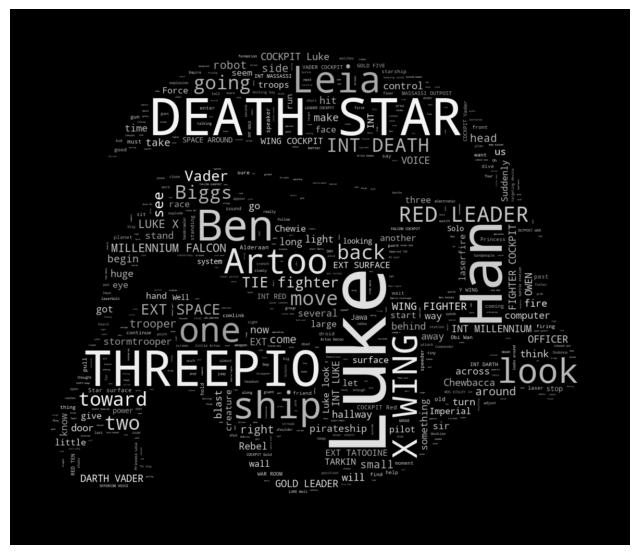

In [40]:
plt.figure(figsize=(8, 8))
plt.imshow(star_wc.recolor(color_func=grey_color_func, random_state=3), cmap=plt.cm.gray, interpolation='bilinear')
plt.axis('off')
plt.show()